In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import networkx as nx

plt.style.use("dark_background")

In [2]:
#results_dir = "../experiments/outputs/2021-07-26_07-14_dist_mnsit_postfix_rho"
#results_dir = "../experiments/outputs/2021-07-26_10-47_dist_mnist_cadmm_scaled_v_const" 
results_dir = "../results/2021-08-21_07-33_dist_mnist_dsgt_vs_cadmm"
results_dir = "../results/2021-09-02_16-21_dist_mnist_v3"

results_a = torch.load(os.path.join(results_dir, "cadmm_results.pt"), map_location=torch.device("cpu")) 
results_b = torch.load(os.path.join(results_dir, "dsgt_results.pt"), map_location=torch.device("cpu"))
results_c = torch.load(os.path.join(results_dir, "dsgd_results.pt"), map_location=torch.device("cpu"))

# Communication Graph

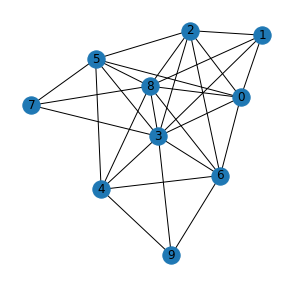

In [3]:
G = nx.read_gpickle(os.path.join(results_dir, "graph.gpickle"))

(fig, ax) = plt.subplots(figsize=(5, 5))
nx.draw_kamada_kawai(G, with_labels=True)


# Validation loss and accuracy results

Text(0, 0.5, 'Top1 Accuracy')

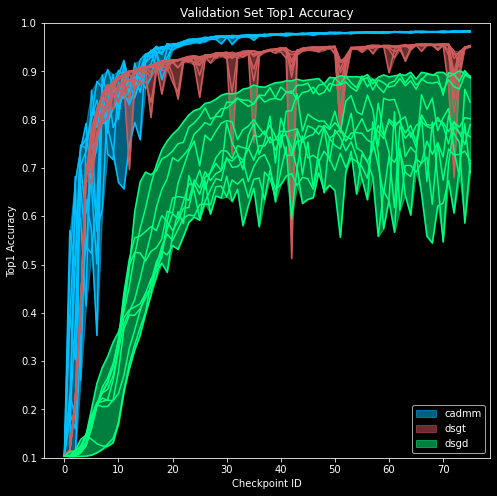

In [6]:
vla = torch.stack(results_a["validation_loss"])
vlb = torch.stack(results_b["validation_loss"])
vlc = torch.stack(results_c["validation_loss"])

aca = torch.stack(results_a["top1_accuracy"])
acb = torch.stack(results_b["top1_accuracy"])
acc = torch.stack(results_c["top1_accuracy"])

#(fig, (ax0, ax1)) = plt.subplots(ncols=2, figsize=(20, 8))
(fig, ax1) = plt.subplots(figsize=(8, 8))

#ax0.plot(vla, c="deepskyblue")
#ax0.fill_between(np.arange(vla.shape[0]), torch.amax(vla, dim=1), torch.amin(vla, dim=1), color="deepskyblue", alpha=0.5, label="cadmm")
#ax0.plot(vlb, c="indianred")
#ax0.fill_between(np.arange(vlb.shape[0]), torch.amax(vlb, dim=1), torch.amin(vlb, dim=1), color="indianred", alpha=0.5, label="dsgt")
#ax0.plot(vlc, c="springgreen")
#ax0.fill_between(np.arange(vlc.shape[0]), torch.amax(vlc, dim=1), torch.amin(vlc, dim=1), color="springgreen", alpha=0.5, label="dsgd")
##ax0.set_ylim((0.0, torch.amax(torch.amax(vl_r1))))
#ax0.legend()
#ax0.set_title("Validation set NLL Loss")
#ax0.set_xlabel("Checkpoint ID")
#ax0.set_ylabel("NLL Loss")

ax1.plot(aca, c="deepskyblue")
ax1.fill_between(np.arange(aca.shape[0]), torch.amax(aca, dim=1), torch.amin(aca, dim=1), color="deepskyblue", alpha=0.5, label="cadmm")
ax1.plot(acb, c="indianred")
ax1.fill_between(np.arange(acb.shape[0]), torch.amax(acb, dim=1), torch.amin(acb, dim=1), color="indianred", alpha=0.5, label="dsgt")
ax1.plot(acc, c="springgreen")
ax1.fill_between(np.arange(acc.shape[0]), torch.amax(acc, dim=1), torch.amin(acc, dim=1), color="springgreen", alpha=0.5, label="dsgd")
ax1.set_ylim((0.1, 1.0))
ax1.legend()
ax1.set_title("Validation Set Top1 Accuracy")
ax1.set_xlabel("Checkpoint ID")
ax1.set_ylabel("Top1 Accuracy")


# Consensus Error

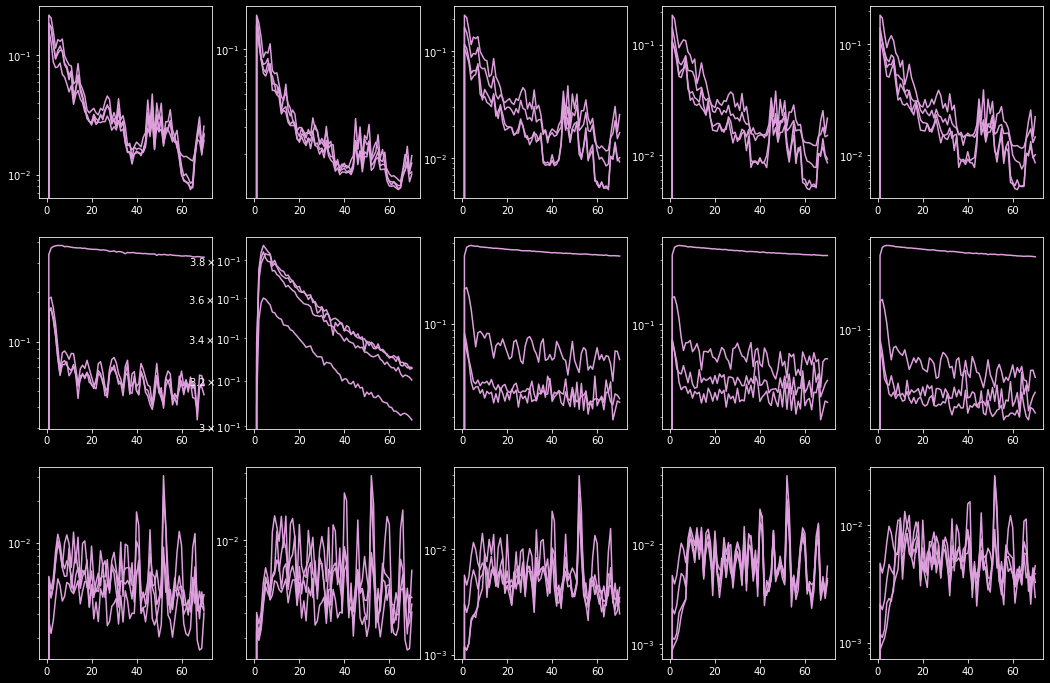

In [5]:
N = 5
(fig, axs) = plt.subplots(ncols=N, nrows=3, figsize=(18, 12))

cea = torch.stack(results_a["consensus_error"])
ceb = torch.stack(results_b["consensus_error"])
cec = torch.stack(results_c["consensus_error"])

ce = [cea, ceb, cec]

for j in range(3):
    for i in range(N):
        for k in range(N):
            if i != k:
                axs[j, i].plot(ce[j][:, i, k], c="plum")
                axs[j, i].set_yscale("log")

In [10]:
acc

tensor([[0.1159, 0.1159, 0.1159, 0.1159, 0.1159, 0.1159, 0.1159, 0.1159, 0.1159,
         0.1159],
        [0.1789, 0.1805, 0.1747, 0.1794, 0.1794, 0.1767, 0.1770, 0.1769, 0.1782,
         0.1781],
        [0.2315, 0.2295, 0.2263, 0.2275, 0.2280, 0.2267, 0.2279, 0.2271, 0.2285,
         0.2292],
        [0.3317, 0.3373, 0.3267, 0.3320, 0.3303, 0.3283, 0.3305, 0.3314, 0.3295,
         0.3326],
        [0.4858, 0.5038, 0.5082, 0.5110, 0.5072, 0.5094, 0.5133, 0.5141, 0.5109,
         0.5156],
        [0.6605, 0.6847, 0.6945, 0.6954, 0.6938, 0.6942, 0.6964, 0.6974, 0.6975,
         0.6981],
        [0.7597, 0.7677, 0.7753, 0.7700, 0.7708, 0.7733, 0.7751, 0.7778, 0.7722,
         0.7742],
        [0.8044, 0.8106, 0.8187, 0.8152, 0.8146, 0.8228, 0.8193, 0.8222, 0.8154,
         0.8179],
        [0.8367, 0.8293, 0.8384, 0.8038, 0.8380, 0.7997, 0.8427, 0.8399, 0.7667,
         0.8367],
        [0.8538, 0.8413, 0.8440, 0.8077, 0.8547, 0.7909, 0.8559, 0.8468, 0.7228,
         0.8530],
        [0